# Rebound Tutorials

Testing and playing around with `rebound`. This YouTube channel has various tutorials: https://www.youtube.com/@reboundcode

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

import rebound

## Tutorial 2: Adding Particles

In [2]:
sim = rebound.Simulation()

In [7]:
sim.add(m=1)
sim.add(m=1e-3, x=1, vy=1)

The below line moves the simulation object to the center-of-mass frame, which addresses an error where the mass at the origin/center of mass drifts away from the origin.

In [8]:
sim.move_to_com() # move simulation to CoM frame

In [14]:
sim.integrate(10000)
sim.status()
print(f'Position of CoM: {sim.calculate_com().xyz}')
print(f'Velocity of CoM: {sim.calculate_com().vxyz}')

---------------------------------
REBOUND version:     	3.23.4
REBOUND built on:    	Feb 10 2023 19:33:52
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	1.0000000000000000e+04
Current timestep:    	0.170290
---------------------------------
<rebound.particle.Particle object at 0x7fd177f72b40, m=1.0 x=0.00011230715062660892 y=0.0009915508835886472 z=0.0 vx=-0.0009936466821210133 vy=0.00011354353045247659 vz=0.0>
<rebound.particle.Particle object at 0x7fd177f72cc0, m=0.001 x=-0.1123071506500738 y=-0.9915508835817097 z=0.0 vx=0.9936466821210083 vy=-0.11354353045247648 vz=0.0>
---------------------------------
Position of CoM: [-2.344144473086813e-14, 6.930662199101145e-15, 0.0]
Velocity of CoM: [-4.9823476457875334e-18, 1.0831190534320725e-19, 0.0]


Create a new simulation and specify orbital elements of an added mass.

In [76]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=1e-3, a=3, e=0.3, f=0.1, omega=0.4, inc=0.1, Omega=0.3)

#sim.move_to_com() # move simulation to CoM frame
sim.integrate(10)
sim.status()

---------------------------------
REBOUND version:     	3.23.4
REBOUND built on:    	Feb 10 2023 19:33:52
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	1.0000000000000000e+01
Current timestep:    	0.465772
---------------------------------
<rebound.particle.Particle object at 0x7fd1788d57c0, m=1.0 x=-0.000497002720851264 y=0.007070697497900784 z=0.0006924867966578843 vx=-0.0004313787263791659 vy=0.0010210892809741682 vz=0.0001106656295036>
<rebound.particle.Particle object at 0x7fd17845e040, m=0.001 x=-3.5405070320730148 y=0.007503935713391696 z=0.10569857904679841 vx=-0.118998340891142 vy=-0.4636067259236737 vz=-0.040909857949271336>
---------------------------------


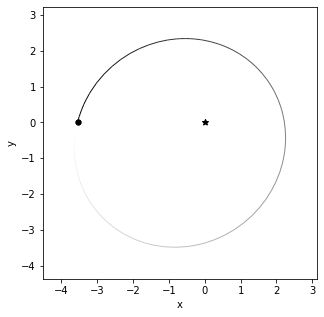

In [78]:
op = rebound.OrbitPlot(sim, projection='xy')

Rebound uses Jacobi coordinates; basically, this means that the orbits use the center of mass of all interior particles as their primary particle. (See the [OrbitPlot documentation](https://rebound.readthedocs.io/en/latest/ipython_examples/OrbitPlot/).) Because of this, **remember to always add particles from inside out.**

Below, we use the NASA Horizons system to add objects directly. One can add multiple particles at a time. Furthermore, the system loads the real-time parameters of the object as default, but the `date` option lets us take the parameters of the planet as they were on that date.

In [70]:
date = '2023-02-07 14:30:00'

sim = rebound.Simulation()
sim.add(['Sun', 'Venus', 'Earth'], date=date)
sim.move_to_com() # move simulation to CoM frame

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')


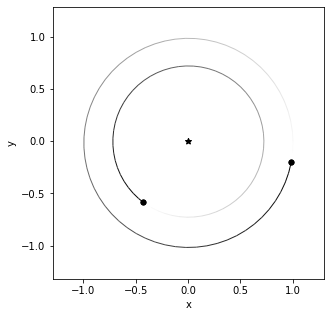

In [71]:
sim.integrate(10)
op = rebound.OrbitPlot(sim, projection='xy')

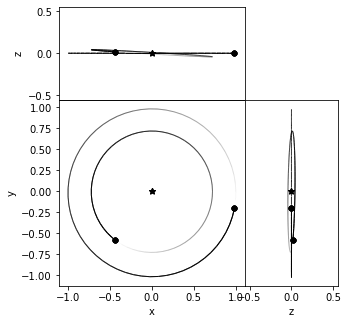

In [75]:
op_set = rebound.OrbitPlotSet(sim)

## Example: Earth and Sun

In [72]:
sim_earth_sun = rebound.Simulation()
sim_earth_sun.add(['Sun', 'Earth'], date=date)
sim_earth_sun.move_to_com() # move simulation to CoM frame

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')


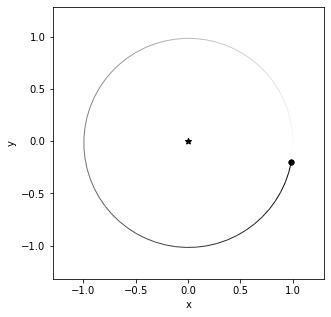

In [73]:
sim_earth_sun.integrate(10)
op = rebound.OrbitPlot(sim_earth_sun, projection='xy')

## Exploring orbital elements

See this documentation: https://rebound.readthedocs.io/en/latest/orbitalelements/. In particular, I want to understand the orientation of inclination. For example, if inc > 0 and Omega = 0, does this mean that L points toward the negative x direction (like in the documentation's diagram)? Or does it point towards the x direction?

In [33]:
## Initialize simulation
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')

M_e = 3.00273e-6 # Earth mass in Msun

star_mass = 1.0
P_ratio = 1.51

# Each planet has 3 provided params: mass (m) in Earth masses, semimajor axis (a), 
# and inclination (inc). The four omitted orbital params (e, f, omega, Omega) 
# are left at their default values of 0.
b_params = {
    "m": 4.19 * M_e, 
    "a": 0.0719, 
    "inc": 0.4, # ~23 degrees
    #"inc": 0,
    "Omega": 0
}

c_params = {
    "m": 4.16 * M_e, 
    "a": b_params['a'] * P_ratio**(2/3), # a \propto P^(2/3)
    #"inc": 0.8, # ~46 degrees
    "inc": 0,
    "Omega": np.pi
}

sim.add(m=star_mass)
sim.add(m=b_params['m'], a=b_params['a'], inc=b_params['inc'], Omega=b_params['Omega'])
#sim.add(m=c_params['m'], a=c_params['a'], inc=c_params['inc'], Omega=c_params['Omega'])

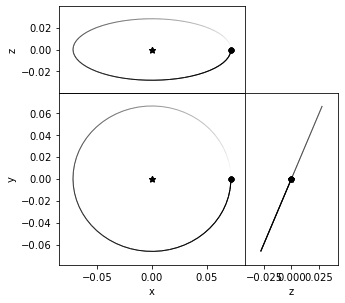

In [35]:
op_set = rebound.OrbitPlotSet(sim)

In [28]:
sim.angular_momentum?

In [36]:
Lx, Ly, Lz = sim.angular_momentum()
Lx, Ly, Lz

(0.0, -8.254400806633575e-06, 1.952349385183865e-05)

Conclusions:
- When setting inc > 0, I find that the L vector points in the positive y direction (instead of the negative y direction, as expected). HOWEVER, sim.angular_momentum() says that the angular momentum has a negative y component. Confusing.